<h1> To compare the time required to sort different types of list of different lengths<h1/>

<h2> <strong>Step 0</strong> : Importing essential libraries</h2>

In [57]:
import timeit
import matplotlib.pyplot as plt
import random

<h2> <strong>Step 1</strong> : Defining our functions</h2>

<h3> <strong>Step 1.1</strong> : Defining a Time function</h3>

In [58]:
#Function to check for time-taken
def time(com):
    return timeit.timeit(com, number=1, globals=globals())

<h3> <strong>Step 1.2</strong> : Defining the sorting algorithms</h3>

<h4>1. Insert Sort</h4>

In [59]:
def insert_sort(arr):
    for i in range(1, len(arr)):
        x = arr[i]
        j = i - 1
        while j >= 0 and (x< arr[j]): 
            arr[j + 1] = arr[j]
            j = j - 1
        arr[j + 1] = x
    return arr 

In [60]:
insert_sort([6,5,5,4,2,1])

[1, 2, 4, 5, 5, 6]

<h4>2. Merge Sort</h4>

In [61]:
def merge(a,b):
    d = [None for x in range(0,len(b) + len(a))]
    i =0
    j =0
    for k in range(0,len(d)):
        if i>=len(a) :
            d[k] = b[j]
            j=j+1
            continue
        if j>=len(b) :
            d[k] = a[i]
            i=i+1
            continue    
        if a[i] < b[j] :
            d[k] = a[i]
            i = i+1
        else:
            d[k] = b[j]
            j = j+1
    return d     

def merge_sort(A,m,n):
    if (n-m)  == 1:
        return [A[m]]
    else:
        p =(m+n)//2
        B = merge_sort(A,m,p)
        C = merge_sort(A,p,n)
        D = merge(B,C)
        return D    
        
def merge_sort_all(A):
    return merge_sort(A,0,len(A))

In [62]:
merge_sort_all([6,5,5,4,2,1])

[1, 2, 4, 5, 5, 6]

<h4>3. Bubble Sort</h4>

In [63]:
def bub_sort(arr):
    '''
    Modified bubble sort
    if ctr = 0 then we break from the outer loop, this is because the array is sorted
    So this implementation takes O(N) for sorted arrays
    '''
    ctr = 0              
    for i in range(0,len(arr)-1):
        for j in range(0,len(arr)-i-1):
            if arr[j]>arr[j+1]:
                ctr =ctr + 1
                arr[j],arr[j+1]=arr[j+1],arr[j] # Swapping 
        if ctr == 0 : break        
    return arr            

In [64]:
bub_sort([5,41,1,5,6,8,2,3])

[1, 2, 3, 5, 5, 6, 8, 41]

<h4>4. QuickSort</h4>

In [129]:
def partition(A,p,r):
    pivot = A[r]
    i = p - 1
    for j in range(p,r):
        if A[j] < pivot:
            i += 1
            A[i], A[j] = A[j], A[i]
    A[i+1], A[r] = A[r], A[i+1]
    return (i+1)
    
def quick_sort(A,p,r):
    if p < r:
        split = partition(A,p,r)
        quick_sort(A,p,split-1)
        quick_sort(A,split+1,r)
    return A    
def quick_sort_all(A):
    return quick_sort(A,0,len(A)-1)

In [113]:
A = [10, 7, 8, 9, 1, 5]
quick_sort_all(A)
print(A)

[1, 7, 8, 9, 5, 10]


<h4>3. Heap Sort</h4>

<h3> <strong>Step 1.3</strong> : Defining the list generation algorithms</h3>

In [114]:
# Returns a sorted array
def gen_sort_list(length):
    return [i for i in range(length)]

In [115]:
gen_sort_list(5)

[0, 1, 2, 3, 4]

In [116]:
# Returns a reverse sorted list
def gen_rev_list(length):
    return [(length-i-1) for i in range(length)]

In [117]:
gen_rev_list(5)

[4, 3, 2, 1, 0]

In [118]:
#Returns a randomized list
def gen_rand_list(length):
    return [random.randrange(0,length) for i in range(length)]

In [119]:
gen_rand_list(5)

[0, 4, 2, 3, 0]

<h2> <strong>Step 2</strong> : Generating the strings required for the time function</h2>

In [120]:
'''
Function takes two parameters, number of time strings (eg. insert_sort("AVBCD")) to and 
the function to generate the strings (gen_sort_list or gen_rev_list or gen_rand_list)
'''
def time_strings(length,gen_list):    
    time_insert_strings = ['insert_sort({})'.format(gen_list(i)) for i in range(1,length+1)] 
    time_bub_strings = ['bub_sort({})'.format(gen_list(i)) for i in range(1,length+1)]
    time_merge_strings = ['merge_sort_all({})'.format(gen_list(i)) for i in range(1,length+1)]
    lengths = [i+1 for i in range(length)] #x's
    return [time_insert_strings,time_bub_strings,time_merge_strings,lengths]
#time_default_strings = ['insert_sort({})'.format(gen_sort_list(i)) for i in range(1,100)]

def time_string(length,gen_list, sort_type): 
    sort_func = ''
    if sort_type == 'insert':
        sort_func = 'insert_sort({})'
    elif  sort_type == 'bubble':  
        sort_func = 'bub_sort({})'
    elif sort_type == 'merge':
        sort_func = 'merge_sort_all({})'
    elif sort_type == 'quick':
        sort_func = 'quick_sort_all({})'
    else : assert False, "Invalid sort type (Choose from insert, bubble, merge or quick)"  
        
    return [sort_func.format(gen_list(i)) for i in range(1,length+1)] 
    

In [121]:
time_string(10,gen_sort_list,'insert')

['insert_sort([0])',
 'insert_sort([0, 1])',
 'insert_sort([0, 1, 2])',
 'insert_sort([0, 1, 2, 3])',
 'insert_sort([0, 1, 2, 3, 4])',
 'insert_sort([0, 1, 2, 3, 4, 5])',
 'insert_sort([0, 1, 2, 3, 4, 5, 6])',
 'insert_sort([0, 1, 2, 3, 4, 5, 6, 7])',
 'insert_sort([0, 1, 2, 3, 4, 5, 6, 7, 8])',
 'insert_sort([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])']

In [122]:
time_string(10,gen_rev_list, 'bubble')

['bub_sort([0])',
 'bub_sort([1, 0])',
 'bub_sort([2, 1, 0])',
 'bub_sort([3, 2, 1, 0])',
 'bub_sort([4, 3, 2, 1, 0])',
 'bub_sort([5, 4, 3, 2, 1, 0])',
 'bub_sort([6, 5, 4, 3, 2, 1, 0])',
 'bub_sort([7, 6, 5, 4, 3, 2, 1, 0])',
 'bub_sort([8, 7, 6, 5, 4, 3, 2, 1, 0])',
 'bub_sort([9, 8, 7, 6, 5, 4, 3, 2, 1, 0])']

In [123]:
time_string(10,gen_rand_list, 'merge')

['merge_sort_all([0])',
 'merge_sort_all([0, 1])',
 'merge_sort_all([2, 1, 2])',
 'merge_sort_all([2, 1, 0, 3])',
 'merge_sort_all([1, 4, 0, 4, 1])',
 'merge_sort_all([0, 0, 0, 0, 5, 1])',
 'merge_sort_all([4, 4, 3, 3, 5, 1, 6])',
 'merge_sort_all([0, 3, 6, 0, 2, 2, 2, 1])',
 'merge_sort_all([6, 7, 0, 3, 7, 0, 6, 4, 1])',
 'merge_sort_all([7, 0, 6, 3, 1, 5, 5, 6, 7, 5])']

<h2> <strong>Step 3</strong> : Generating the y's of our plot, that is, the time taken by each algorithm for the best case (sorted list)</h2>

In [124]:
length = 1000
time_insert_sort= [time(str) for str in  time_string(length, gen_sort_list, 'insert')]
time_bub_sort=[time(str) for str in  time_string(length, gen_sort_list, 'bubble')]
time_merge_sort=[time(str) for str in  time_string(length, gen_sort_list, 'merge')]
time_quick_sort = [time(str) for str in  time_string(length, gen_sort_list, 'quick')]
lengths = [i+1 for i in range(length)]

<h2> <strong>Step 3.1</strong> : Plotting the values for sorted arrays</h2>

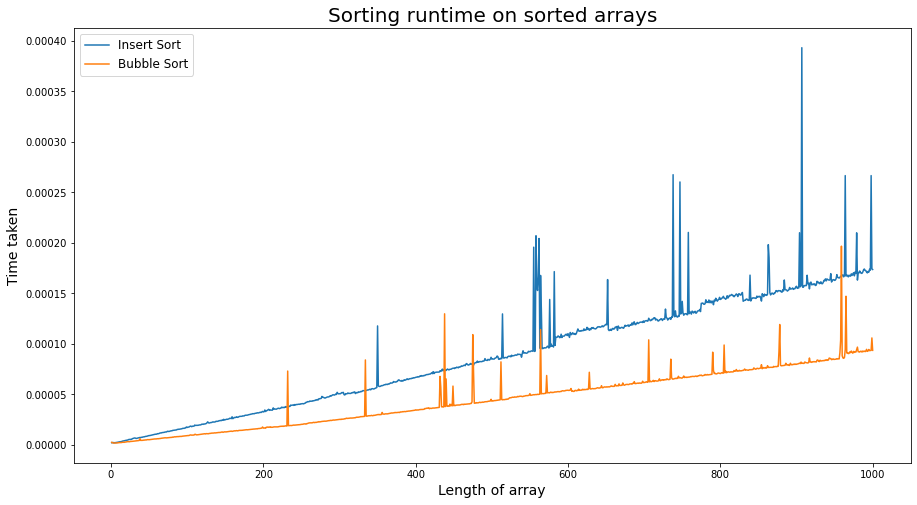

In [127]:
fig,ax = plt.subplots(figsize=(15,8))
plt.title('Sorting runtime on sorted arrays',size=20)
plt.xlabel('Length of array', size = 14)
plt.ylabel('Time taken', size = 14)
ax.plot(lengths,time_insert_sort,label='Insert Sort')
ax.plot(lengths,time_bub_sort,label='Bubble Sort')
ax.legend(fontsize = 12)

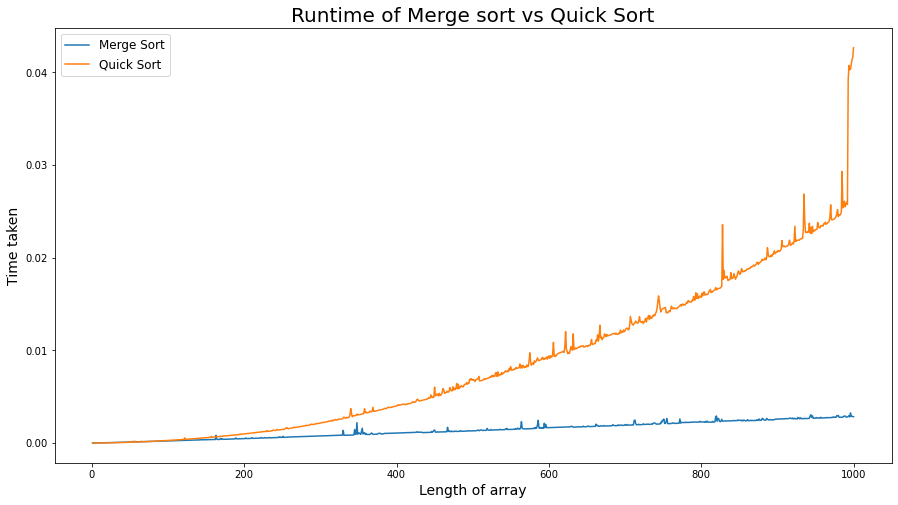

In [126]:
fig,ax = plt.subplots(figsize=(15,8))
plt.title('Runtime of Merge sort vs Quick Sort on Sorted Arrays',size=20)
plt.xlabel('Length of array', size = 14)
plt.ylabel('Time taken', size = 14)
ax.plot(lengths,time_merge_sort,label='Merge Sort')
ax.plot(lengths,time_quick_sort,label='Quick Sort')
ax.legend(fontsize = 12)

Quicksort performs poorly in comparision to Merge Sort. O(n^2) time complexity is shown by Quick sort.

<h2> <strong>Step 4</strong> : Generating the y's of our plot, that is, the time taken by each algorithm for the worst case (reverse list)</h2>

In [131]:
length = 1000
lengths = [i+1 for i in range(length)]

In [132]:
time_insert_sort= [time(str) for str in  time_string(length, gen_rev_list, 'insert')]

In [133]:
time_bub_sort=[time(str) for str in  time_string(length, gen_rev_list, 'bubble')]

In [134]:
time_merge_sort=[time(str) for str in  time_string(length, gen_rev_list, 'merge')]

In [135]:
time_quick_sort = [time(str) for str in  time_string(length, gen_rev_list, 'quick')]

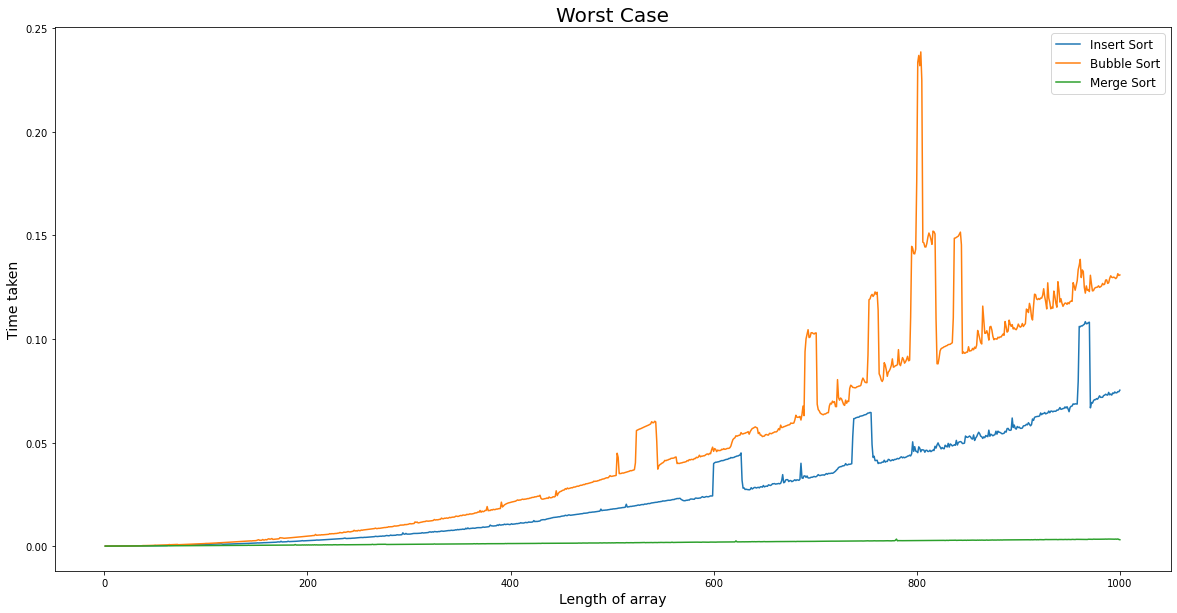

In [136]:
fig,ax = plt.subplots(figsize=(20,10))
plt.title('Sorting runtime on reversed arrays',size=20)
plt.xlabel('Length of array', size = 14)
plt.ylabel('Time taken', size = 14)
ax.plot(lengths,time_insert_sort,label='Insert Sort')
ax.plot(lengths,time_bub_sort,label='Bubble Sort')
ax.plot(lengths,time_merge_sort,label='Merge Sort')
ax.legend(fontsize = 12)

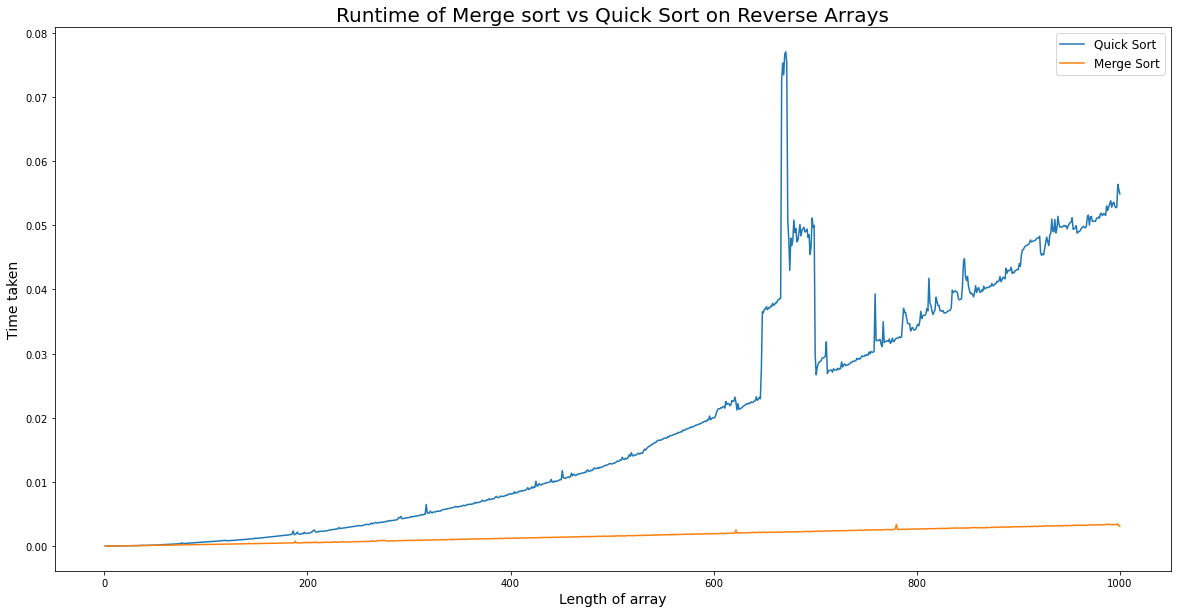

In [137]:
fig,ax = plt.subplots(figsize=(20,10))
plt.title('Runtime of Merge sort vs Quick Sort on Reverse Arrays',size=20)
plt.xlabel('Length of array', size = 14)
plt.ylabel('Time taken', size = 14)
ax.plot(lengths,time_quick_sort,label='Quick Sort')
ax.plot(lengths,time_merge_sort,label='Merge Sort')
ax.legend(fontsize = 12)

<h2> <strong>Step 4</strong> : Generating the y's of our plot, that is, the time taken by each algorithm for the average case (random list)</h2>

In [138]:
length = 1000
time_insert_sort= [time(str) for str in  time_string(length, gen_rand_list, 'insert')]
time_bub_sort=[time(str) for str in  time_string(length, gen_rand_list, 'bubble')]
time_merge_sort=[time(str) for str in  time_string(length, gen_rand_list, 'merge')]
time_quick_sort = [time(str) for str in  time_string(length, gen_rand_list, 'quick')]
lengths = [i+1 for i in range(length)]

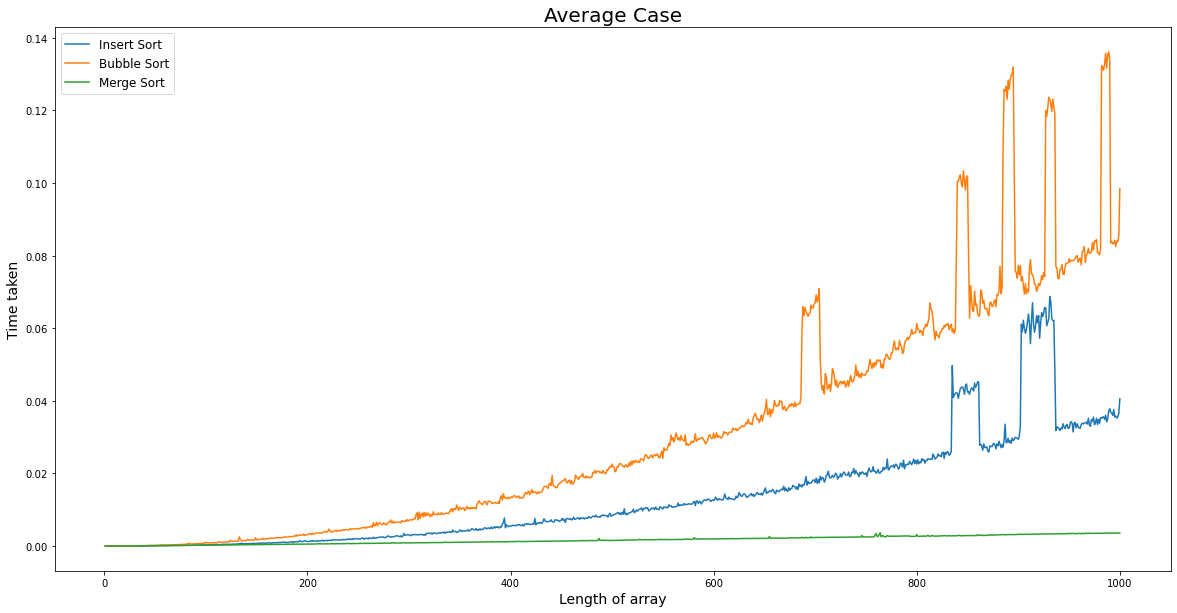

In [140]:
fig,ax = plt.subplots(figsize=(20,10))
plt.title('Average Case',size=20)
plt.xlabel('Length of array', size = 14)
plt.ylabel('Time taken', size = 14)
ax.plot(lengths,time_insert_sort,label='Insert Sort')
ax.plot(lengths,time_bub_sort,label='Bubble Sort')
ax.plot(lengths,time_merge_sort,label='Merge Sort')
ax.legend(fontsize = 12)

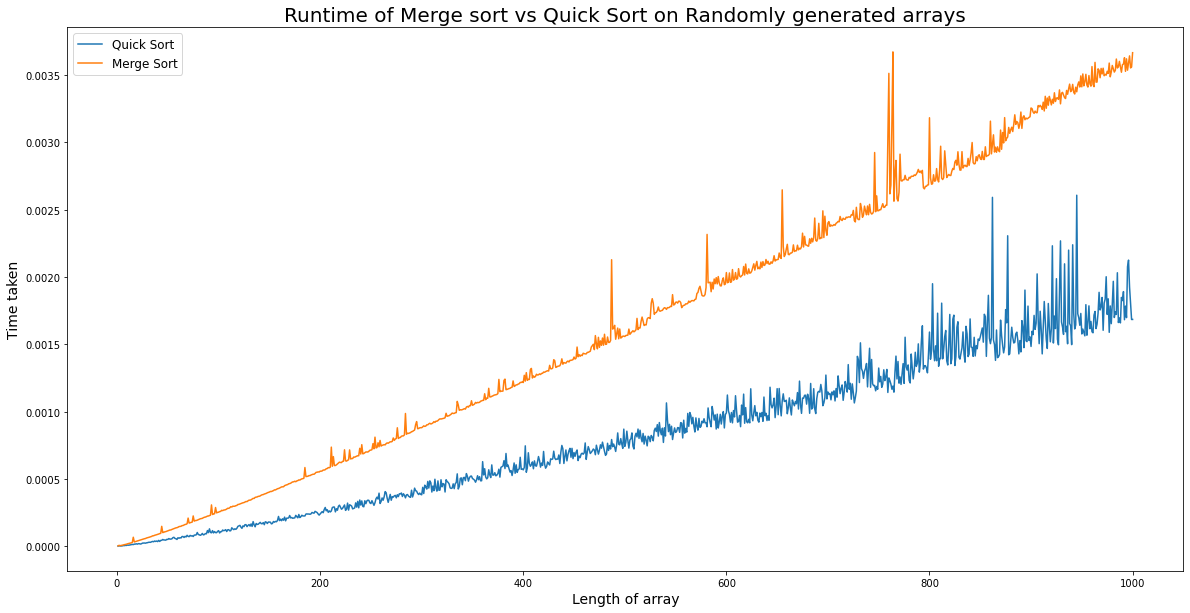

In [141]:
fig,ax = plt.subplots(figsize=(20,10))
plt.title('Runtime of Merge sort vs Quick Sort on Randomly generated arrays',size=20)
plt.xlabel('Length of array', size = 14)
plt.ylabel('Time taken', size = 14)
ax.plot(lengths,time_quick_sort,label='Quick Sort')
ax.plot(lengths,time_merge_sort,label='Merge Sort')
ax.legend(fontsize = 12)